# Computational Finance Course Work


# Coure work Part one

Import necessary libraries for Option pricing analysis

Yfinance package -->  download the financial time series data for "Solana token SOL-USD".

Numpy -->  mathematical operations which are needed in designing a price derivative of a stock.

Pandas -->  data frames and data analysis. 

Matplotlib -->  Ploting the graphs.

OS module --> Helps with OS operations such as creating and removing a directory, fetching its contents, print with string

In [68]:
#Import required libaries
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import scipy.stats as si

Download solana token SOL-USD trading  data from Yahoo Finance from 23rd March'21 - 23rd March'22

In [2]:

solana_eur = yf.download("SOL-USD", start="2021-03-23", end="2022-03-23")

[*********************100%***********************]  1 of 1 completed


In [3]:
solana_eur.head() # Top 5 rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-03-23,14.848619,15.243709,14.097057,14.204831,14.204831,106780662
2021-03-24,14.190396,15.371431,13.661298,13.661298,13.661298,118813690
2021-03-25,13.650586,13.705250,12.614725,13.025085,13.025085,116277943
2021-03-26,13.019528,14.804294,12.370458,14.779421,14.779421,149987319
2021-03-27,14.786246,16.804165,14.758046,16.508322,16.508322,223872587


In [4]:
adj_close =  solana_eur['Adj Close'] #Take only Adj Close 
close = solana_eur['Close']

## Movement of solana_usd price (Adj Close) for 1 year

array([<AxesSubplot:xlabel='Date'>], dtype=object)

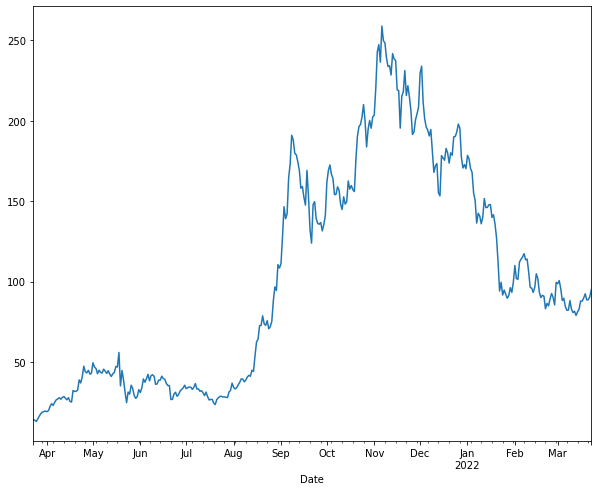

In [5]:
adj_close.plot(figsize=(10, 8), subplots=True)       #Plotting the Adj CLose Column of the data

In [6]:
sol_data = pd.DataFrame(adj_close.dropna()) #Put adj close in the data frame after removing null data
sol_data.tail() # Read last 5 rows of adj_close data

,Adj Close
Date,
2022-03-19,92.418152
2022-03-20,88.614861
2022-03-21,88.757202
2022-03-22,90.512970
2022-03-23,95.102684


Maximum Price in this 1 year time period

In [7]:
sol_data[sol_data['Adj Close'] == sol_data['Adj Close'].max()]

,Adj Close
Date,
2021-11-06,258.934326


In [8]:
sol_data.describe().round(2) # Descriptive Statistics for Adjacent close price 

,Adj Close
count,366.00
mean,102.14
std,67.98
min,13.03
25%,36.69
50%,90.33
75%,159.08
max,258.93


## Simple moving average calculation and plot with window 20 days and 60 days

In [9]:
sol_data['SMA1'] = sol_data['Adj Close'].rolling(window=20).mean()
sol_data['SMA2'] = sol_data['Adj Close'].rolling(window=60).mean()
sol_data[['Adj Close', 'SMA1', 'SMA2']].tail()

,Adj Close,SMA1,SMA2
Date,,,
2022-03-19,92.418152,87.785435,95.761047
2022-03-20,88.614861,87.240160,94.974755
2022-03-21,88.757202,86.745343,94.333954
2022-03-22,90.512970,86.238509,93.976402
2022-03-23,95.102684,86.216684,93.991808


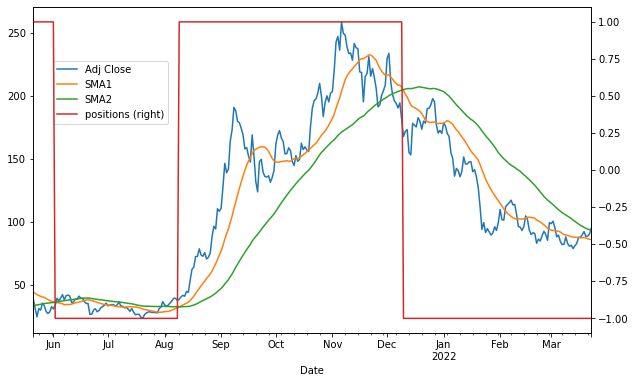

In [10]:
sol_data.dropna(inplace=True)
sol_data['positions'] = np.where(sol_data['SMA1'] > sol_data['SMA2'],1,-1)
ax = sol_data[['Adj Close', 'SMA1', 'SMA2', 'positions']].plot(figsize=(10, 6),secondary_y='positions')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85))

# Returns and volatility 


In [11]:
sol_adj_close = pd.DataFrame(adj_close.dropna())

## Normal Daily  Return
Simple normal return is just the percentage changes of returns.The following code derives the percentage returns  

In [12]:
normal_return = sol_adj_close.pct_change()
normal_return.head()

,Adj Close
Date,
2021-03-23,NaN
2021-03-24,-0.038264
2021-03-25,-0.046570
2021-03-26,0.134689
2021-03-27,0.116980


## Annualized normal return and annualized volatility

In [13]:
dfnr = pd.DataFrame(normal_return, columns = ['Adj Close']) 
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualized normal return is %.8f and its annualized volatility is %.8f' % (nr,nv))

The annualized normal return is 2.91583396 and its annualized volatility is 1.42381769


## Daily  Log Return 
Log return will be used in option pricing as it help us to measure in the comparable metrics.

In [14]:
log_rets = np.log(sol_adj_close / sol_adj_close.shift(1))
log_rets.head().round(4)

,Adj Close
Date,
2021-03-23,NaN
2021-03-24,-0.0390
2021-03-25,-0.0477
2021-03-26,0.1264
2021-03-27,0.1106


## Annualized Log return and annualized Volatility 

In [15]:
dflr = pd.DataFrame(log_rets, columns = ['Adj Close']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return is %.8f and its annualized volatility is %.8f ' % (lr,lv))

The annualized log return is 1.90658431 and its annualized volatility is 1.42668409 




As Volatility is flactuating highly over this one year period, calculated annualized volatility  over different intervals of time and taken the average

LAST 3 MONTHS RETURN AND VOLATILITY FOR SOLANA

In [16]:
log_return_last_3months=log_rets[-90:]
log_return_last_3months

,Adj Close
Date,
2021-12-24,0.001246
2021-12-25,0.014856
2021-12-26,0.024954
2021-12-27,-0.013071
2021-12-28,-0.096648
...,...
2022-03-19,0.028493
2022-03-20,-0.042024
2022-03-21,0.001605


In [17]:
dflr1 = pd.DataFrame(log_return_last_3months, columns = ['Adj Close']) 
lr1 = dflr1.mean() * len(dflr)
lv1 = dflr1.std() * (len(dflr) ** 0.5)
print('The annualized log return (for the last 3 months) is %.8f and its annualized volatility is %.8f' % (lr1,lv1))

The annualized log return (for the last 3 months) is -2.81518253 and its annualized volatility is 1.01844119


Mid year (Aug'21 - Dec'21) LOG RETURN AND VOLATILITY FOR SOLANA

In [18]:
log_return_mid_year=log_rets[150:-90]
log_return_mid_year

,Adj Close
Date,
2021-08-20,0.078822
2021-08-21,-0.065191
2021-08-22,-0.012995
2021-08-23,0.039115
2021-08-24,-0.068850
...,...
2021-12-19,-0.015083
2021-12-20,-0.036334
2021-12-21,0.036304


In [19]:
dflr2 = pd.DataFrame(log_return_mid_year, columns = ['Adj Close']) 
lr2 = dflr2.mean() * len(dflr)
lv2 = dflr2.std() * (len(dflr) ** 0.5)
print('The mid year annualized  log return (for Aug21 - Dec21) is %.8f and its annualized volatility is %.8f' % (lr2,lv2))

The mid year annualized  log return (for Aug21 - Dec21) is 2.78880884 and its annualized volatility is 1.20666474


## Average Anualized  volatility for different interval 

In [20]:
all_lv=lv,lv2,lv1
all_lv1 = pd.DataFrame (all_lv)

In [21]:
lv_avg=all_lv1 ['Adj Close'].mean()
print ('The combine Annualized Log volatility =', lv_avg)

The combine Annualized Log volatility = 1.2172633384281009


In [22]:
all_lr = lr,lr2,lr1
all_lr1 = pd.DataFrame (all_lr)

In [23]:
lr_avg=all_lr1 ['Adj Close'].mean()
print ('The combine Annualized Log Return =', lr_avg)

The combine Annualized Log Return = 0.626736876797804


## Movement of closed price and log volatility

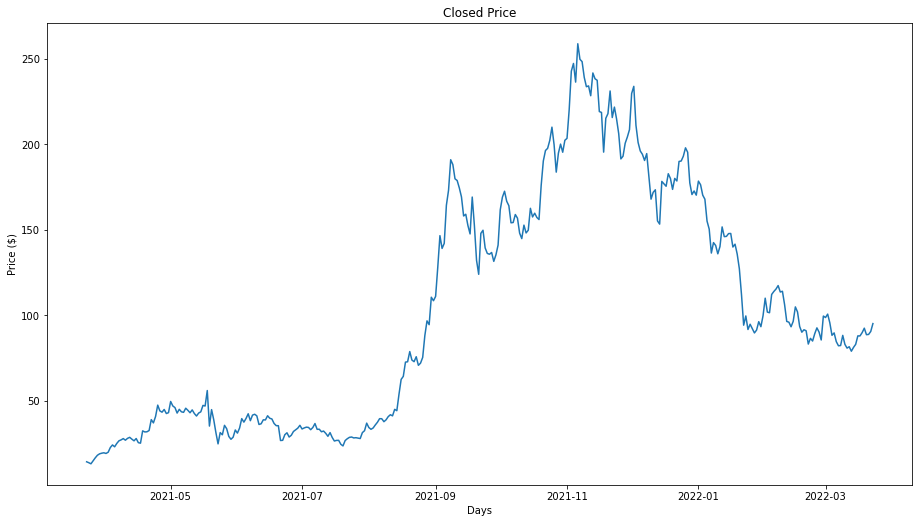

In [24]:
fig = plt.figure()
fig.set_size_inches(15.5, 8.5, forward=True)
plt.plot(solana_eur['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');

Text(0.5, 1.0, 'Log Return')

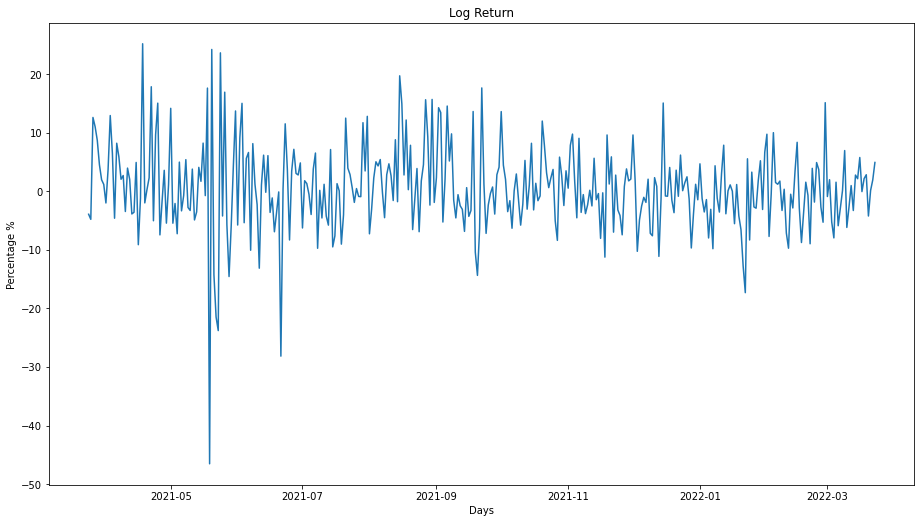

In [25]:
fig = plt.figure()
fig.set_size_inches(15.5, 8.5, forward=True)
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage %')
plt.title('Log Return')

Text(0.5, 1.0, 'SOL-USD Average annualized volatility:121.73%')

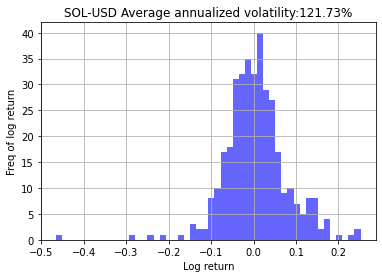

In [26]:
str_vol = str(round(lv_avg, 4)*100)
fig, ax = plt.subplots()
dflr['Adj Close'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('SOL-USD Average annualized volatility:'+ str_vol + '%')

# Coursework part two

European put option pricing using two different model  

## Binomial Tree (CRR Tree)

## Data Input
Binomial Tree pricing method is discrete model. Valuation is performed iteratively, starting at each of the final nodes, and then working backwards through the tree towards the first node (valuation date). The value computed at each stage is the value of the option at that point in time.

In [27]:
S0 = 95.10            # spot stock price (Adj close price of SOL-USD on 23rd Mar'22)  
K = 85.0              # As it's put option, I'm choosing strike price ( $85.0) below the current spot price
T = 1/52              # Time to maturity  is set as 1 week
r = 0.0163              # Risk free rate 1 year bond as dated on 26,Mar'22    
sig = 1.2172         # Average annualized log volatility (last one year, mid-period of the tenure and last 3 months)
N = 6                 # Number of time steps  
payoff = "put"        # the option type 

## Step 1: Create the binomial price tree. 

At each step, it is assumed that the underlying instrument will move up or down by a specific factor ( u or d) per step of the tree (where, by definition, u ≥ 1 and 0 < d ≤ 1 ). So, if S is the current price, then in the next period the price will either be S_up = Su or S_down = Sd.

In [28]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 
print ('Crypto Price movement UP factor %s and DOWN factor %s ' %(u,d))

Crypto Price movement UP factor 1.071340191657207 and DOWN factor 0.9334103282853096 


In [29]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [30]:
S

array([[ 95.1       , 101.88445223, 109.15290858, 116.93989799,
        125.28241273, 134.22008406, 143.79537058],
       [  0.        ,  88.76732222,  95.1       , 101.88445223,
        109.15290858, 116.93989799, 125.28241273],
       [  0.        ,   0.        ,  82.85633537,  88.76732222,
         95.1       , 101.88445223, 109.15290858],
       [  0.        ,   0.        ,   0.        ,  77.3389592 ,
         82.85633537,  88.76732222,  95.1       ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         72.1889833 ,  77.3389592 ,  82.85633537],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  67.3819426 ,  72.1889833 ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,  62.89500116]])

Probability for price moving up or down 

In [31]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability

In [32]:
print('Probalilty for moving  up : ', p)
print('Probalilty for moving  down : ', q)

Probalilty for moving  up :  0.4831579981303179
Probalilty for moving  down :  0.5168420018696821


## Step 2: Find option value at each final node. 

At each final node of the tree-i.e. at expiration of the option-the option value is simply its intrinsic, or exercise, value: Max[(K-S_n),0] for a put option, where K is the strike price and S_n is the spot price of the underlying asset at the n-th period.

In [33]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)

In [34]:
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  2.14366463],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 12.8110167 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 22.10499884]])

## Step 3: Find option value at earlier nodes. 

Once the above step is complete, the option value is then found for each node, starting at the penultimate time step, and working back to the first node of the tree (the valuation date) where the calculated result is the value of the option.

## European Option 

In [35]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[ 2.32589712,  0.84177619,  0.15293162,  0.        ,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  3.71352895,  1.48581197,  0.29591173,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  5.79643493,  2.59831335,  0.57256799,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  8.78671213,  4.49229801,
         1.10787804,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 12.80213576,
         7.65660021,  2.14366463],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        17.61361681, 12.8110167 ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , 22.10499884]])

In [36]:
print('European ' + payoff, str( V[0,0]))

European put 2.325897119058203


# Monte Carlo Simulation

In [54]:
def mcs_simulation_np(p,s):
    M = p  # M is number of time steps
    I = s  # I is number of simulation
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [55]:
T = 1/52
r = 0.0163
sigma = 1.2172
S0 = 95.10 
K = 85.0

Underlying asset price is calculated using 100 time steps and 10,000 simulations

In [56]:
S = mcs_simulation_np(100,10000)

In [57]:
S = np.transpose(S)
S

array([[ 95.1       ,  92.16897775,  91.16618635, ...,  93.38890079,
         95.28046976,  94.18336547],
       [ 95.1       ,  95.57281907,  98.70655315, ..., 133.37761316,
        133.27574057, 133.98173472],
       [ 95.1       ,  92.29349241,  95.04504002, ...,  85.45325762,
         85.89647112,  85.59144888],
       ...,
       [ 95.1       ,  94.50066765,  93.83947364, ...,  82.86310343,
         83.88887633,  84.08200908],
       [ 95.1       ,  92.62039834,  92.88603708, ...,  92.85282834,
         92.89213645,  93.86933979],
       [ 95.1       ,  95.09208369,  92.0196516 , ...,  79.73945281,
         79.48403337,  78.38430387]])

Text(0, 0.5, 'Frequency')

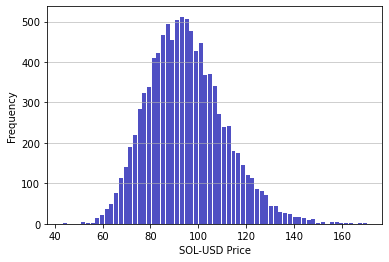

In [58]:

import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
#n, bins, patches = plt.hist(x=S[:,1], bins=[30,40,50,60,70,80,90,100,110,120],range =(S.min(),S.max()), color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('SOL-USD Price')
plt.ylabel('Frequency')

In [59]:
p = np.mean(np.maximum(K - S[:,-1],0))
print('European put from Monte Carlo Simulation', str(p))

European put from Monte Carlo Simulation 2.3185644799980762


# Black Scholes Model

In [69]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [70]:
bsp = euro_option_bs(95.10,85.0,1/52,0.0163,1.2172, "put")
print('European put option price using BSM is $', bsp)

European put option price using BSM is $ 2.2871251980676313


In [71]:
S = np.linspace(10,180,25)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i], 85.0,1/52,0.0163,1.2172, "put")

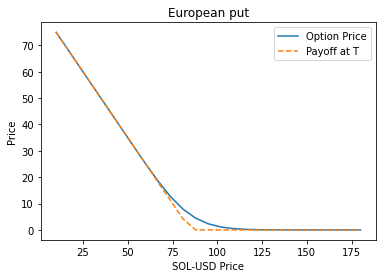

In [72]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(85- S,0), '--')
plt.xlabel('SOL-USD Price')
plt.ylabel('Price')
plt.title('European put')
plt.legend(['Option Price','Payoff at T'])

## The average European put price (SOL-USD)

In [73]:
print(' Binomial price tree method - Eurpoean put price for SOL-USD wiht 1 week expiry  ' , str( V[0,0].round(4)))
print(' Monte Carlo Simulation method -Eurpoean put price for SOL-USD with 1 week expiry  ', str(p.round(4)))
print(' BSM method - Eurpoean put price for SOL-USD with 1 week expiry  ', bsp.round(4))

 Binomial price tree method - Eurpoean put price for SOL-USD wiht 1 week expiry   2.3259
 Monte Carlo Simulation method -Eurpoean put price for SOL-USD with 1 week expiry   2.3186
 BSM method - Eurpoean put price for SOL-USD with 1 week expiry   2.2871


In [74]:
Put_prices=( float( V[0,0].round(4)),(p.round(4)),bsp)
Put_price1 = pd.DataFrame (Put_prices)

In [75]:
Put_price1['Method'] = ('Binomial price tree ', 'Monte Carlo Simulation method', 'Black Scholes Model')
Put_price1.columns = ['Price','Method' ]
Put_price1

,Price,Method
0,2.325900,Binomial price tree
1,2.318600,Monte Carlo Simulation method
2,2.287125,Black Scholes Model


In [76]:
Price_mean= Put_price1['Price'].mean()
print ('The combine Vanilla put price for SOL-USD is $', Price_mean)

The combine Vanilla put price for SOL-USD is $ 2.3105417326892104


# Course work Part 3

## Greeks for risk assessment

Greeks helps trader to better understand the risk and possible rewards associated with a option.

## Delta
Delta, ∆, measures the rate of change of the theoretical option value with respect to changes in the underlying asset's price. Delta is the first derivative of the value V of the option with respect to the underlying instrument's price S.

In [426]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

In [77]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [78]:
d = delta(95.10,85.0,1/52,0.0163, 0,1.2172, "put")
print('The value of Delta is', d.round(4),'.','If the stock price decrease (or increase) $1, then the value of the option will increase(or decrease) by $', abs(d).round(4))

The value of Delta is -0.2262 . If the stock price decrease (or increase) $1, then the value of the option will increase(or decrease) by $ 0.2262


In [79]:
S = np.linspace(20,200,15)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i], 85.0,1/52, 0.0163, 0, 1.2172, "put")

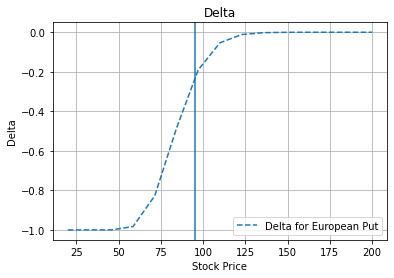

In [80]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.axvline(95.10)
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for European Put'])

In [81]:
S = np.linspace(60, 150, 15)
T = np.linspace(0.001, 0.03, 15)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 85.0,T[i], 0.0163, 0, 1.2172, "put")

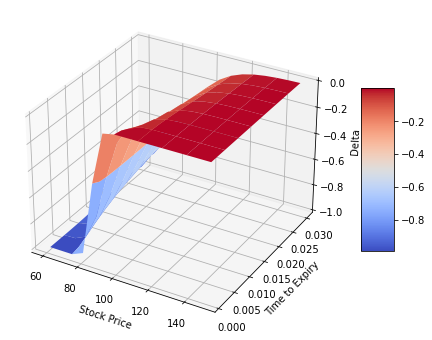

In [82]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Gamma
Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [83]:
def gamma(S, K, T, r, q, vol):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [84]:
g = gamma(95.102684,85.0,1/52, 0.0163,0, 1.2172)
print('The value of Gamma is', g.round(4),'.','If the stock price increase (or decrease) $1, then the value of the delta will increase (or decrease) by', abs(g).round(4))

The value of Gamma is 0.0187 . If the stock price increase (or decrease) $1, then the value of the delta will increase (or decrease) by 0.0187


In [85]:
S = np.linspace(10,200,15)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 85.0,1/52, 0.0163,0, 1.2172)

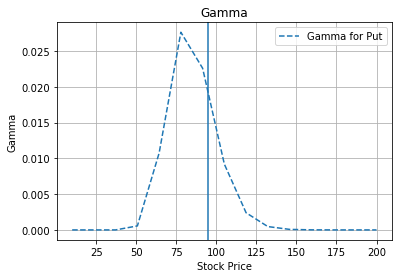

In [86]:
fig = plt.figure()
plt.plot(S, Gamma, '--')
plt.grid()
plt.axvline(95.10)
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])

In [87]:
S = np.linspace(70, 100, 60)
T = np.linspace(0.001, 0.005, 10)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 85.0,T[i], 0.0163,0, 1.2172)

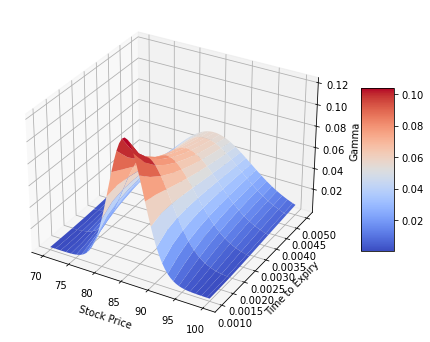

In [88]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Speed
Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [89]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [91]:
s = speed(95.102684,85.0,1/52, 0.0163,0, 1.2172, "put")

print('The value of Speed is', s.round(4),'.','If the stock price decrease (or increase) $1, then the value of the gamma will increase (or decrease) by', abs(s).round(4))

The value of Speed is -0.0001 . If the stock price decrease (or increase) $1, then the value of the gamma will increase (or decrease) by 0.0001


In [92]:
S = np.linspace(20,200,15)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i],85.0,1/52,0.0163,0, 1.2172, "put")

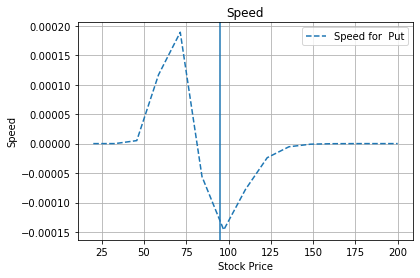

In [93]:
fig = plt.figure()
plt.plot(S, Speed, '--')
plt.grid()
plt.axvline(95.10)
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for  Put'])

In [94]:
S = np.linspace(50, 100, 60)
T = np.linspace(0.001, 0.005, 60)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j],85.0,T[i],0.0163,0, 1.4385, "put")

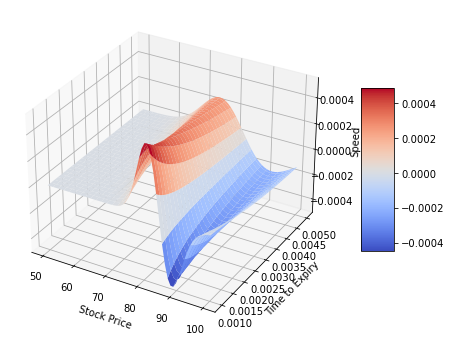

In [95]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Theta
Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [96]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [99]:
t = theta(95.10,85.0,1/52, 0.0163,0, 1.2172, 'put')
t_1 = t/365
print('Annualized Theta value is ', t.round(4), 'and Theta value for 1 day before maturity is ', t_1.round(4))

Annualized Theta value is  125.9372 and Theta value for 1 day before maturity is  0.345


In [100]:
print('At time 1 day  before maturity, option value decrease by ', t_1.round(4))

At time 1 day  before maturity, option value decrease by  0.345


In [101]:
T = np.linspace(0.001,0.04,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(95.10,85.0, T[i], 0.0163, 0,1.2172, 'put')

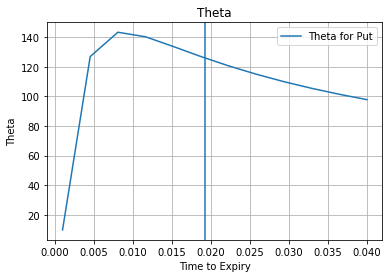

In [102]:
fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.axvline(1/52)
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend([ 'Theta for Put'])

In [103]:
S = np.linspace(70, 100, 20)
T = np.linspace(0.01, 0.04, 20)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j],85.0, T[i],0.0163, 0,1.2172, 'put')

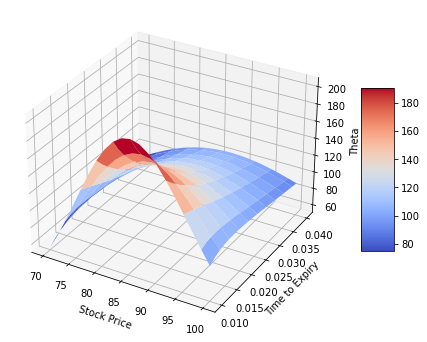

In [104]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

## Rho
Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term).

In [105]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [106]:
r = rho(95.102684,85.0,1/52, 0.0163, 0,1.2172, 'put')
print('The value of Rho is', r.round(4),'.','If the interest rate decrease by 1%, then the value of the put option will increase by $', abs(r).round(4))

The value of Rho is -0.4576 . If the interest rate decrease by 1%, then the value of the put option will increase by $ 0.4576


In [107]:
r = np.linspace(0,0.07,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(95.102684,85.0,1/52, r[i],0,1.2172, 'put')

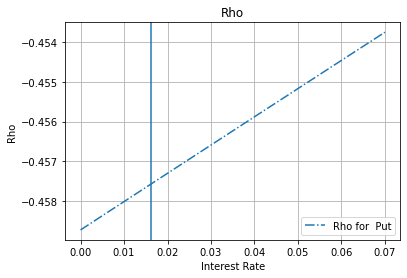

In [108]:
fig = plt.figure()
plt.plot(r, Rho_Put, '-.')
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.grid()
plt.axvline(0.0163)
plt.title('Rho')
plt.legend(['Rho for  Put'])


In [109]:
S = np.linspace(50, 150, 30)
R = np.linspace(0,0.07,30)
Rho = np.zeros((len(R),len(S)))
for j in range(len(S)):
    for i in range(len(R)):
        Rho[i,j] = rho(S[j],85.0,1/52, R[i],0,1.2172, 'put')

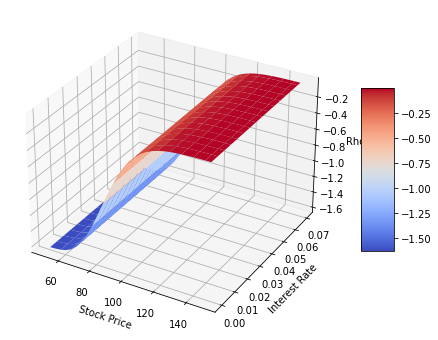

In [110]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,R = np.meshgrid(S,R)
surf = ax.plot_surface(S,R, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Interest Rate')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);


## Vega
Vega measures sensitivity to volatility. Vega is the derivative of the option value with respect to the volatility of the underlying asset.

In [111]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [459]:
v = vega(95.10,85.0,1/52, 0.0163,0, 1.2172, 'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01)

The value of Vega is 3.9672 . If the volatility increases 1%, then the value of the option will increase $ 0.039672


In [460]:
vol = np.linspace(0.1,10,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(95.10,85.0,1/52, 0.0163,0, vol[i], 'put')

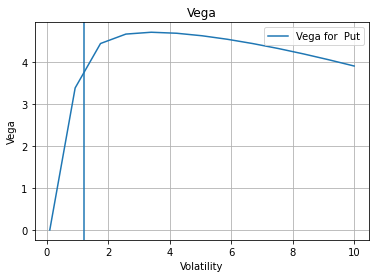

In [461]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.axvline(1.2172)
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for  Put'])

In [462]:
S = np.linspace(50, 100, 30)
V =  np.linspace(0.1,10,30)
Vega = np.zeros((len(V),len(S)))
for j in range(len(S)):
    for i in range(len(V)):
        Vega[j,i] = vega(S[j] ,85.0,1/52, 0.0163,0, V[i], 'put')

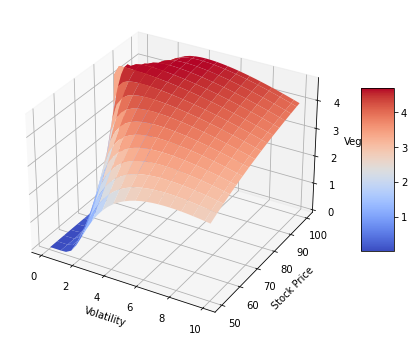

In [463]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
V, S = np.meshgrid(V, S)
surf = ax.plot_surface(V, S, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_ylabel('Stock Price')
ax.set_xlabel('Volatility')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);

END